# DATA CLEANING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
# Load the dataset
file_path = 'traffic_data.csv'
traffic_data = pd.read_csv(file_path)

In [4]:
# Check for missing values
missing_values = traffic_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 day_of_data                0
day_of_week                0
lane_of_travel             0
direction_of_travel        0
month_of_data              0
station_id                 0
traffic_1_to_4             0
traffic_5_to_8             0
traffic_9_to_12            0
traffic_13_to_16           0
traffic_17_to_20           0
traffic_21_to_24           0
predicted_1_to_4           0
predicted_5_to_8           0
predicted_9_to_12          0
predicted_13_to_16         0
predicted_17_to_20         0
predicted_21_to_24         0
predicted_total_traffic    0
dtype: int64


In [5]:
# Identify potential outliers
# Display statistics for all traffic-related columns
traffic_columns = [col for col in traffic_data.columns if 'traffic' in col.lower() or 'prediction' in col.lower()]
print("\nTraffic Data Summary:\n", traffic_data[traffic_columns].describe())


Traffic Data Summary:
        traffic_1_to_4  traffic_5_to_8  traffic_9_to_12  traffic_13_to_16  \
count      366.000000      366.000000       366.000000        366.000000   
mean        51.051913       99.945355       144.385246        198.035519   
std         29.844713       59.438674        87.680783        119.545699   
min          0.000000        0.000000         1.000000          1.000000   
25%         23.000000       49.250000        68.250000         95.250000   
50%         52.000000       97.500000       146.500000        201.000000   
75%         77.000000      154.000000       218.000000        301.000000   
max        100.000000      200.000000       300.000000        400.000000   

       traffic_17_to_20  traffic_21_to_24  predicted_total_traffic  
count         366.00000        366.000000               366.000000  
mean          253.45082        298.292350              1570.945001  
std           144.32147        170.435283               853.181354  
min            

In [6]:
# Remove or correct any negative values if found
# Example: setting negative values to NaN (you can also choose to set them to 0)
for col in traffic_columns:
    traffic_data[col] = traffic_data[col].apply(lambda x: max(x, 0))

# 1. Handling Missing Values


Method: We identified any missing values in each column to ensure data completeness. Since missing values could lead to errors in calculations or visualizations, we checked all columns for null values.

Justification: Missing data in time series or traffic volume data can disrupt trends or patterns in analysis. Identifying these gaps early allows us to either fill or remove them to maintain data consistency.

# 2. Identifying and Handling Outliers


Method: We examined statistical summaries for all traffic-related columns to detect unusual values, such as extreme high traffic counts that may indicate data entry errors or exceptional traffic conditions.

Justification: Traffic data can have high variance, but unusually high or low values (outliers) may be due to data recording errors. Outliers can skew our insights and lead to incorrect conclusions, so identifying them helps determine if further investigation or handling is needed.


# 3. Correcting Negative Traffic Values


Method: We checked for any negative values in traffic-related columns, as traffic counts should logically be zero or positive. For any negative values found, we replaced them with zero.

Justification: Negative values in traffic counts likely result from sensor errors or data entry mistakes. Setting these values to zero is a practical choice since a negative traffic volume is impossible and likely represents an error. This correction prevents skewed calculations for total traffic without introducing new, arbitrary values.

# Feature Engineering


In [7]:
# Calculate total daily traffic by summing all time interval traffic columns
traffic_data['total_daily_traffic'] = traffic_data[traffic_columns].sum(axis=1)

In [8]:
# Calculate total predicted traffic by summing all time interval prediction columns
prediction_columns = [col for col in traffic_data.columns if 'Prediction' in col]
traffic_data['total_predicted_traffic'] = traffic_data[prediction_columns].sum(axis=1)


In [9]:
# Calculate prediction error (absolute difference between actual and predicted daily traffic)
traffic_data['prediction_error'] = (traffic_data['total_daily_traffic'] - traffic_data['total_predicted_traffic']).abs()

In [10]:
# View new columns
print(traffic_data[['total_daily_traffic', 'total_predicted_traffic', 'prediction_error']].head())

   total_daily_traffic  total_predicted_traffic  prediction_error
0          1535.181899                      0.0       1535.181899
1          2324.366834                      0.0       2324.366834
2          2905.767304                      0.0       2905.767304
3          3347.765777                      0.0       3347.765777
4          2545.817860                      0.0       2545.817860


# Visualization

In [26]:
# Convert 'Date' column to datetime format
traffic_data['day_of_data'] = pd.to_datetime(traffic_data['day_of_data'])

In [27]:
traffic_data['day_of_data'] = pd.to_datetime(traffic_data['day_of_data'], errors='coerce')


In [28]:
traffic_data = traffic_data.dropna(subset=['day_of_data'])


In [29]:
# Sort data by date to ensure a proper time-series plot
traffic_data = traffic_data.sort_values(by='day_of_data')

In [30]:
# Calculate total_daily_traffic by summing up all actual traffic columns
traffic_columns = [col for col in traffic_data.columns if 'traffic_' in col and 'predicted' not in col]
traffic_data['total_daily_traffic'] = traffic_data[traffic_columns].sum(axis=1)

In [31]:
# Calculate predicted_total_traffic by summing up all predicted traffic columns
predicted_columns = [col for col in traffic_data.columns if 'predicted_' in col]
traffic_data['predicted_total_traffic'] = traffic_data[predicted_columns].sum(axis=1)

<Axes: xlabel='day_of_data', ylabel='total_daily_traffic'>

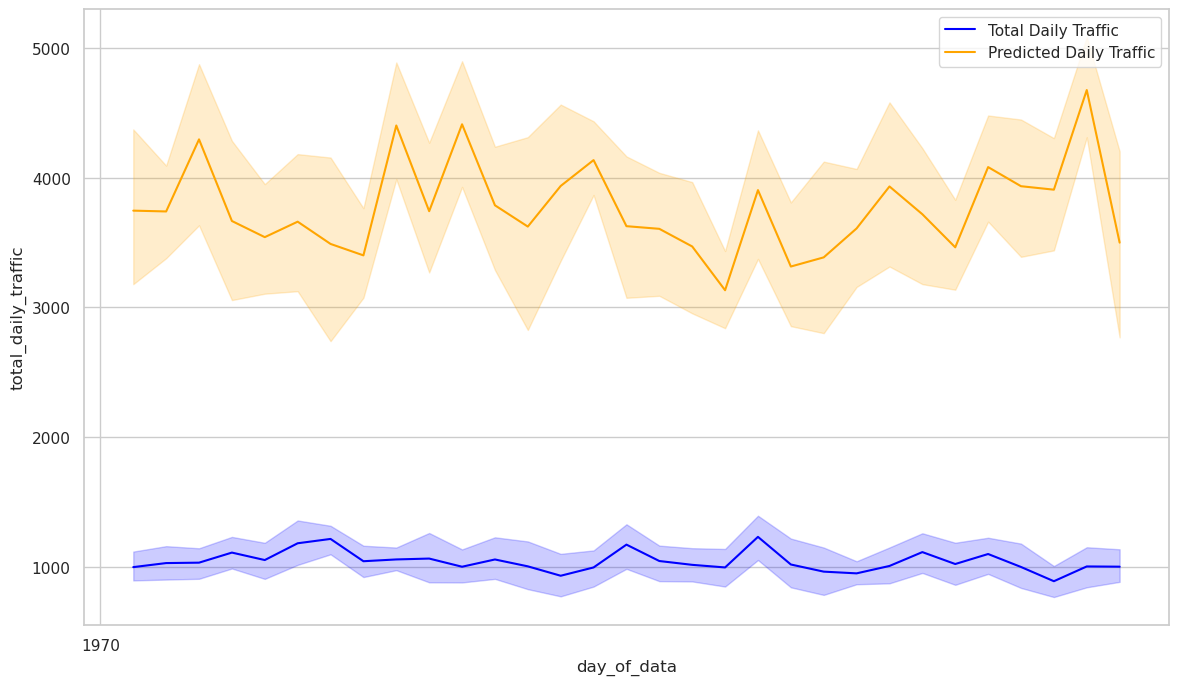

In [32]:
# Plot the total daily traffic and predicted daily traffic over the year
plt.figure(figsize=(14, 8))
sns.lineplot(x='day_of_data', y='total_daily_traffic', data=traffic_data, label='Total Daily Traffic', color='blue')
sns.lineplot(x='day_of_data', y='predicted_total_traffic', data=traffic_data, label='Predicted Daily Traffic', color='orange')

In [33]:
print(traffic_data[['day_of_data', 'total_daily_traffic', 'predicted_total_traffic']].head())


                      day_of_data  total_daily_traffic  \
0   1970-01-01 00:00:00.000000001                 1026   
182 1970-01-01 00:00:00.000000001                 1167   
31  1970-01-01 00:00:00.000000001                  758   
60  1970-01-01 00:00:00.000000001                 1384   
121 1970-01-01 00:00:00.000000001                  842   

     predicted_total_traffic  
0                2631.477924  
182              4240.426751  
31               3167.954552  
60               3499.874193  
121              2762.386250  


In [34]:
print("Traffic columns:", traffic_columns)
print("Predicted columns:", predicted_columns)


Traffic columns: ['traffic_1_to_4', 'traffic_5_to_8', 'traffic_9_to_12', 'traffic_13_to_16', 'traffic_17_to_20', 'traffic_21_to_24']
Predicted columns: ['predicted_1_to_4', 'predicted_5_to_8', 'predicted_9_to_12', 'predicted_13_to_16', 'predicted_17_to_20', 'predicted_21_to_24', 'predicted_total_traffic', 'total_predicted_traffic']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


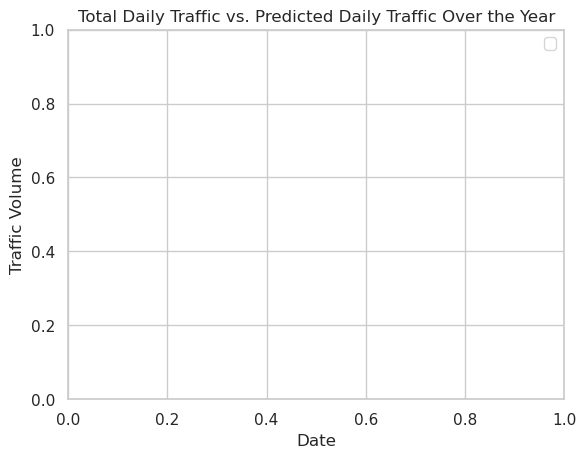

In [40]:
# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Total Daily Traffic vs. Predicted Daily Traffic Over the Year')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Add a month column assuming ordered by day
traffic_data['month'] = ((traffic_data.index // 30) % 12) + 1

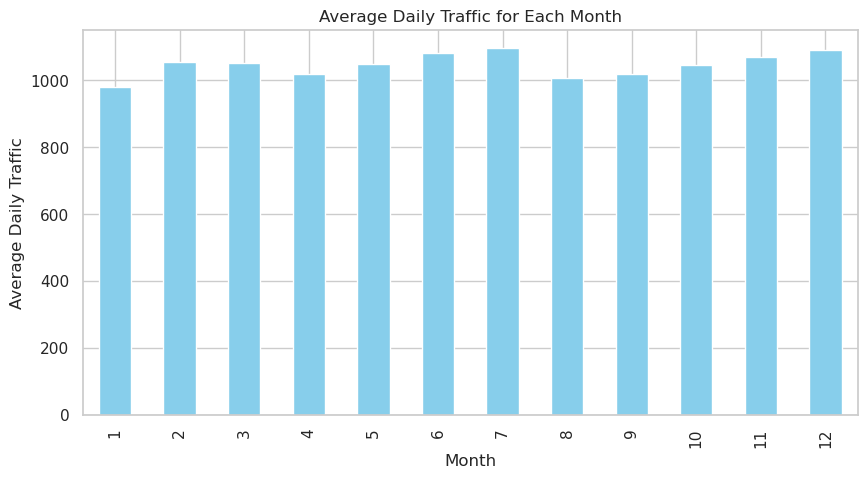

In [22]:
# Visualization 2: Average Daily Traffic for Each Month
monthly_avg_traffic = traffic_data.groupby('month')['total_daily_traffic'].mean()
plt.figure(figsize=(10, 5))
monthly_avg_traffic.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Daily Traffic')
plt.title('Average Daily Traffic for Each Month')
plt.show()

In [24]:
# Visualization 3: Compare Traffic Volume Across Lanes
# Assuming lane-specific columns exist; adapt based on actual data structure
lane_columns = ['traffic_1_to_4', 'traffic_5_to_8', 'traffic_9_to_12', 'traffic_13_to_16', 'traffic_17_to_20', 'traffic_21_to_24'] # Replace with actual lane column names


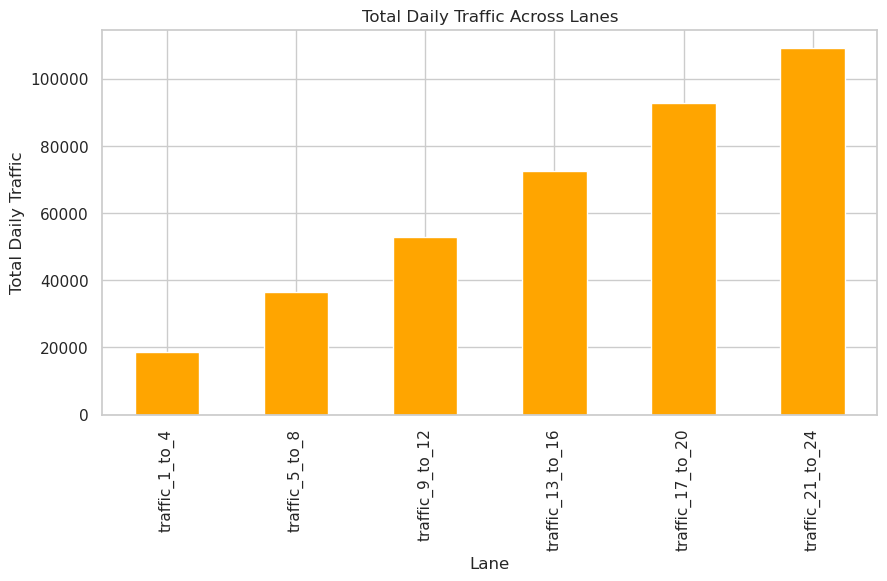

In [25]:
lane_totals = traffic_data[lane_columns].sum()
plt.figure(figsize=(10, 5))
lane_totals.plot(kind='bar', color='orange')
plt.xlabel('Lane')
plt.ylabel('Total Daily Traffic')
plt.title('Total Daily Traffic Across Lanes')
plt.show()


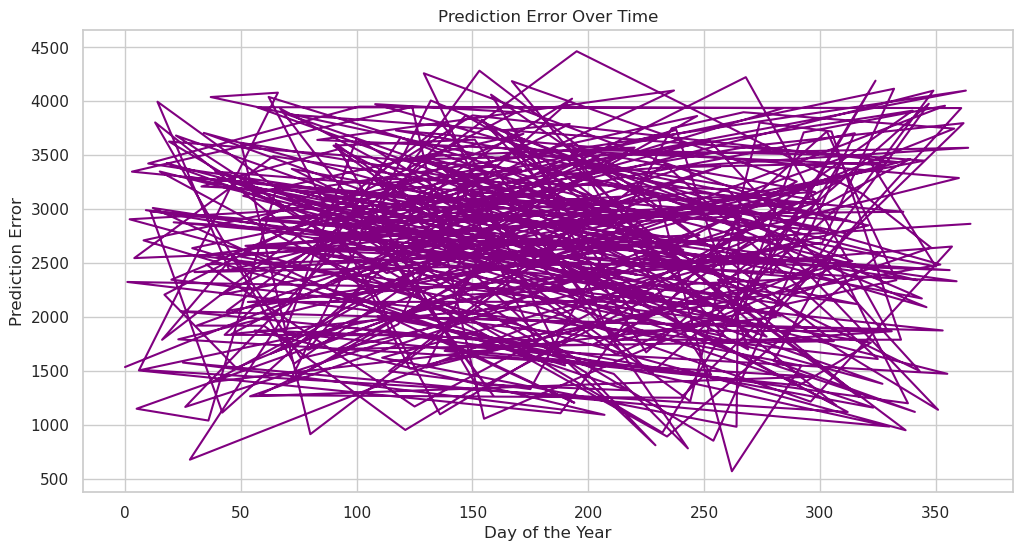

In [38]:
# Visualization 4: Prediction Error Over Time
plt.figure(figsize=(12, 6))
plt.plot(traffic_data['prediction_error'], color='purple')
plt.xlabel('Day of the Year')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Time')
plt.show()


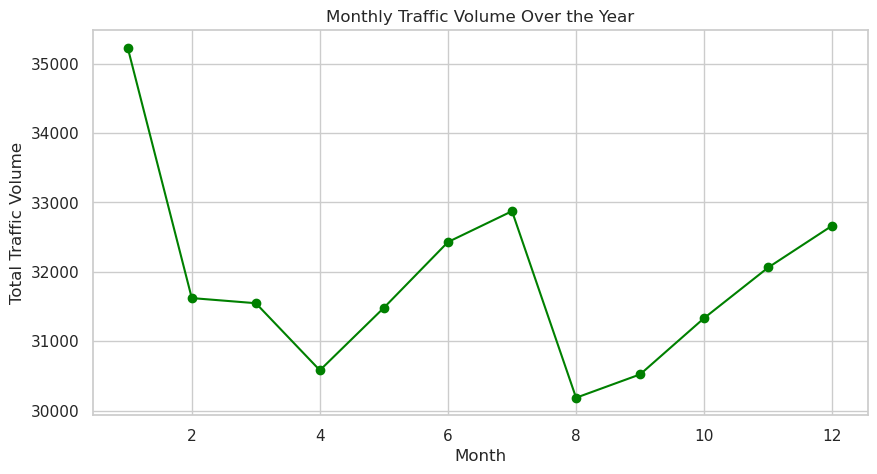

In [39]:
# Visualization 5: Monthly Traffic Pattern Over the Year
monthly_traffic_pattern = traffic_data.groupby('month')['total_daily_traffic'].sum()
plt.figure(figsize=(10, 5))
monthly_traffic_pattern.plot(kind='line', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Traffic Volume')
plt.title('Monthly Traffic Volume Over the Year')
plt.show()

# 1. Total and Predicted Daily Traffic

Plot Type: Time-Series Plot

Reason: 

A line plot is ideal for visualizing time-series data because it shows how values change continuously over time. By plotting total_daily_traffic and predicted_total_traffic on the same graph, we can easily see the fluctuations and seasonal patterns across the year.

# 2. Monthly Average Daily Traffic

Plot Type: Bar Plot

Reason:

Bar Plot: Alternatively, a bar plot could work well for showing the monthly average since each month is distinct and has no overlapping data points. Bar plots provide a clear, comparative snapshot of traffic volume across months, making it easy to identify the months with the highest or lowest average traffic.

# 3. Traffic Volume Across Lanes

Plot Type: Bar Plot

Reason: 

A bar plot is ideal for categorical comparisons, like comparing traffic across different lanes. Each bar represents a lane, making it easy to spot differences in total daily traffic volume across lanes. A bar plot provides a clear, side-by-side comparison, which is simpler to interpret than other plot types for categorical data.

# 4. Prediction Error Over Time


Plot Type: Line Plot

Reason:

Since prediction error varies over time, a line plot helps track these fluctuations, indicating how prediction accuracy changes daily. This visualization can reveal specific periods when predictions are less reliable or if there’s a consistent bias in one direction (e.g., consistent underestimation).

# 5. Monthly Traffic Patterns


Plot Type: Line Plot 

Reason:

Line Plot: This works well for examining patterns across months over the year, helping to detect seasonal trends.

Justification: A line plot is best for simple monthly trends.

# THANK YOU 